In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train = []
valid = []
test = []
C_list = np.logspace(-5, 4, 10, base=10)
for i in C_list:
    model = LogisticRegression(random_state=0, max_iter=10000, C=i)
    df_train = pd.read_csv('train.feature.txt')
    X_train = df_train.drop(columns=['category', 'title'])
    y_train = df_train['category']
    df_valid = pd.read_csv('valid.feature.txt')
    X_valid = df_valid.drop(columns=['category', 'title'])
    y_valid = df_valid['category']
    df_test = pd.read_csv('test.feature.txt')
    X_test = df_test.drop(columns=['category', 'title'])
    y_test = df_test['category']
    model.fit(X_train, y_train)
    train.append(accuracy_score(y_train, model.predict(X_train)))
    valid.append(accuracy_score(y_valid, model.predict(X_valid)))
    test.append(accuracy_score(y_test, model.predict(X_test)))

Text(0, 0.5, 'accuracy')

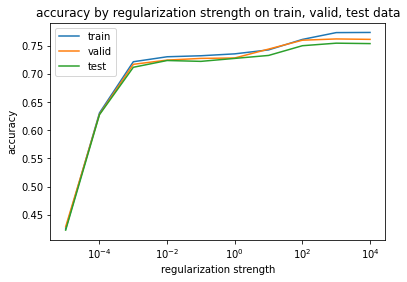

In [2]:
plt.plot(C_list, train)
plt.plot(C_list, valid)
plt.plot(C_list, test)
plt.legend(['train', 'valid', 'test'])
plt.title('accuracy by regularization strength on train, valid, test data')
plt.xlabel('regularization strength')
plt.xscale('log')
plt.ylabel('accuracy')